In [1]:
from Layer import Layer
from NeuralNetwork import NeuralNetwork

import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
from genieclust.plots import plot_scatter

def load_data_classification(path, plot=False):
    raw = pd.read_csv(path)
    set_ = np.array(raw.loc[:, ["x", "y"]])
    labels_ = np.array(raw.cls)
    if plot:
        plot_scatter(set_, np.array(labels_)-1)
        plt.show()
    return set_, labels_.reshape(-1, 1)

def one_hot_encode(Y, k): # k - liczba klas
    Y2 = np.zeros((Y.shape[0], k))
    Y2[np.arange(Y.shape[0]), Y.reshape(-1, )-1] = 1
    return Y2

# class NeuralNetwork2(NeuralNetwork):
#     def __init__(self, loss, momentum):
#         self.epochs = 0
#         self.train_loss = []
#         self.test_loss = []
#         self.history = []
        
#         super().__init__(loss, momentum)
    
#     def plot_error(self, train_loss=None, test_loss=None, epochs=None):
#         if epochs is None:
#             epochs = self.epochs
#         if train_loss is None and test_loss is None:
#             train_loss = self.train_loss
#             test_loss = self.test_loss
            
#         _, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(10, 3))
#         sns.scatterplot(np.arange(epochs), train_loss, ax=ax1).set_title("Błąd na treningowym")
#         sns.scatterplot(np.arange(epochs), test_loss, ax=ax2).set_title("Błąd na testowym")
#         plt.show()
        
#     def plot_results(self, set_):
#         plot_scatter(set_, self.forward_pass(set_).argmax(axis=1))
#         plt.show()
    
#     def plots(self, set_, *args):
#         self.plot_error(*args)
#         self.plot_results(set_)
    
#     def train_wrapper(self, train_set, train_labels, test_x=None, test_y=None, epochs=1, learning_rate=1e-2, verbose=True):
#         self.epochs += epochs
#         self.history.append({"epochs": epochs, "learning_rate": learning_rate})
#         try:
#             train_loss, test_loss, _ = self.train(
#                 train_set,
#                 one_hot_encode(
#                     train_labels,
#                     train_labels.max()),
#                 test_set,
#                 one_hot_encode(
#                     test_labels,
#                     test_labels.max()),
#                 epochs=epochs,
#                 learning_rate=learning_rate,
#                 verbose=verbose)
#             self.train_loss += train_loss
#             self.test_loss += test_loss
            
#             self.plots(train_set, train_loss, test_loss, epochs)

#         except KeyboardInterrupt:
#             pass

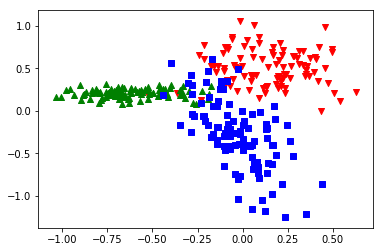

In [2]:
train_set, train_labels = load_data_classification("MGU_projekt1/Classification/data.three_gauss.train.100.csv", plot=True)
test_set, test_labels = load_data_classification("MGU_projekt1/Classification/data.three_gauss.test.100.csv")

# Na czysto

In [22]:
np.random.seed(1234)
nn = NeuralNetwork("cross_entropy", 0)

nn.add(Layer(20, 2, "sigmoid"))
nn.add(Layer(30, 20, "sigmoid"))
nn.add(Layer(3, 30, "softmax"))


In [23]:
train_loss1, test_loss1, _ = nn.train(
    train_set, one_hot_encode(train_labels, 3),
    test_set, one_hot_encode(test_labels, 3),
    epochs=80,
    learning_rate=1e-3
)

79

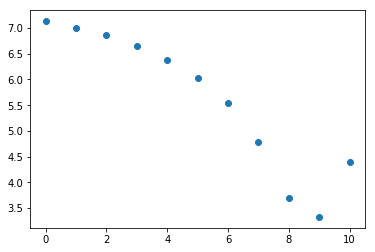

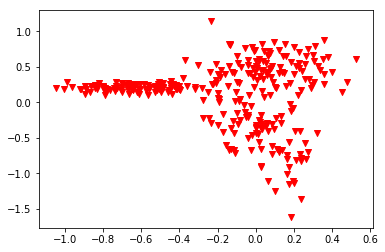

In [24]:
tl = train_loss1

plt.scatter(x=np.arange(len(tl)), y=tl)
plt.show()
plot_scatter(test_set, nn.forward_pass(test_set).argmax(axis=1))

In [25]:
train_loss2, test_loss2, _ = nn.train(
    train_set, one_hot_encode(train_labels, 3),
    test_set, one_hot_encode(test_labels, 3),
    epochs=20,
    learning_rate=1e-2
)

19

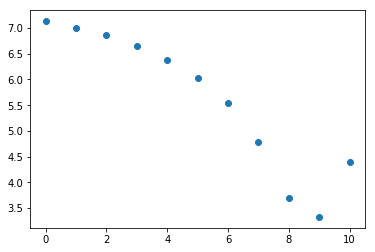

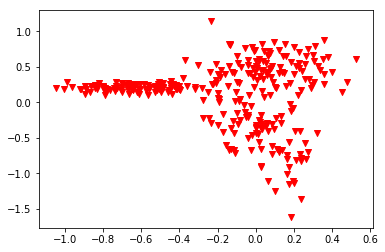

In [26]:
tl = train_loss1 + train_loss2

plt.scatter(x=np.arange(len(tl)), y=tl)
plt.show()
plot_scatter(test_set, nn.forward_pass(test_set).argmax(axis=1))

# seed 58

In [ ]:
np.random.seed(58)
nn2 = NeuralNetwork("cross_entropy", 0)

nn2.add(Layer(20, 2, "sigmoid"))
nn2.add(Layer(30, 20, "sigmoid"))
nn2.add(Layer(3, 30, "softmax"))

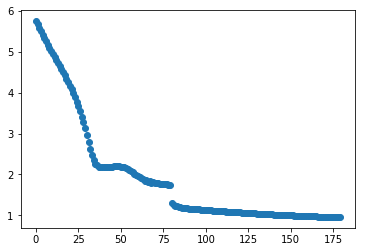

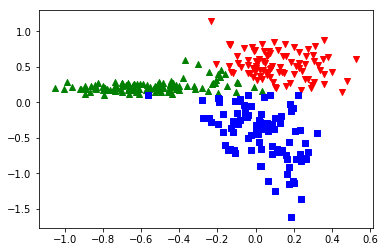

In [10]:
tl = train_loss1 + train_loss2

plt.scatter(x=np.arange(len(tl)), y=tl)
plt.show()
plot_scatter(test_set, nn.forward_pass(test_set).argmax(axis=1))

In [ ]:
train_loss21, test_loss21, _ = nn2.train(
    train_set, one_hot_encode(train_labels, 3),
    test_set, one_hot_encode(test_labels, 3),
    epochs=80,
    learning_rate=1e-4
)

In [ ]:
plt.scatter(x=np.arange(80), y=train_loss21)
plot_scatter(test_set, nn.forward_pass(test_set).argmax(axis=1))

In [ ]:
train_loss22, test_loss22, _ = nn2.train(
    train_set, one_hot_encode(train_labels, 3),
    test_set, one_hot_encode(test_labels, 3),
    epochs=100,
    learning_rate=1e-2
)

In [ ]:
plt.scatter(x=np.arange(180), y=train_loss21+train_loss22)
plot_scatter(test_set, nn.forward_pass(test_set).argmax(axis=1))

In [ ]:
train_loss23, test_loss23, _ = nn2.train(
    train_set, one_hot_encode(train_labels, 3),
    test_set, one_hot_encode(test_labels, 3),
    epochs=100,
    learning_rate=1e-1
)

In [ ]:
plt.scatter(x=np.arange(280), y=train_loss21+train_loss22+train_loss23)
plot_scatter(test_set, nn.forward_pass(test_set).argmax(axis=1))